In [1]:
from utils import css_from_file
css_from_file('style/style.css')

Data preprocessing
----------------------

Data preprocessing is the most important step in the model preparation. It takes 90% of the time to prepare and clean the data so it can be processed by a predictive algorithm.

Here we have the data from Rossmann competition https://www.kaggle.com/c/rossmann-store-sales.

It is a good example of a dataset with many different types of data.

In [2]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [3]:
training_data = pd.read_csv("data/rossmann/train.csv")
store_data = pd.read_csv("data/rossmann/store.csv")

There are information about the Sales (our target).

In [4]:
print("Training data shape", training_data.shape)
training_data.head()

Training data shape (1017209, 9)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


And the stores themselves

In [5]:
print("Store data shape", store_data.shape)
store_data.head()

Store data shape (1115, 10)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


Let's join the data

In [6]:
combined_data = pd.merge(training_data, store_data, on="Store")

# sample the data
combined_data = combined_data.sample(frac=0.1).reset_index()

print("Combined data shape", combined_data.shape)
combined_data.head()

Combined data shape (101721, 19)


,index,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,757580,832,1,2014-08-11,4903,457,1,0,0,1,d,a,5070.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
1,663776,729,1,2013-05-06,8987,1045,1,0,0,0,c,c,8980.0,6.0,2011.0,0,NaN,NaN,NaN
2,615200,676,3,2015-03-11,7850,1920,1,0,0,0,b,b,1410.0,9.0,2008.0,0,NaN,NaN,NaN
3,163602,181,6,2014-04-05,3712,410,1,0,0,0,a,a,12610.0,3.0,2013.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
4,505726,555,5,2013-12-06,7212,621,1,1,0,0,d,a,1560.0,1.0,2014.0,1,10.0,2013.0,"Mar,Jun,Sept,Dec"


In [7]:
combined_data.PromoInterval.value_counts()

Jan,Apr,Jul,Oct     29200
Feb,May,Aug,Nov     11875
Mar,Jun,Sept,Dec     9851
Name: PromoInterval, dtype: int64

Exercise
----------------------

1. Identify types of data present in the dataset:
    - what would you do with each type of data?
    - are there missing values?
2. Write transformer `PandasSelector` which can select subsets of columns from the dataset.
3. Write transformers for each type of data that convert selected columns to numerical values.
4. Combine it all into 1 pipeline using `make_pipeline` and `make_union` functions.

Hint: you will need those imports
```python
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import make_pipeline, make_union
```

Explanation:
`BaseEstimator` and `TransformerMixin` are the classes from which you need to inherit in the your transformer class. They are needed for proper pipeline serialization (saving).

`DictVectorizer` is a transformer that can create a matrix from a dictionary of values - it is helpful to convert categorical variables. 

For example:
Let's say you have 2 columns which you want to convert to a matrix: `StoreType` and `Assortment`

In [8]:
# let's convert 2 columns to a list of dictionaries
data_as_dict = list(store_data.ix[:, ["StoreType","Assortment"]].T.to_dict().values())[:10]
data_as_dict

[{'Assortment': 'a', 'StoreType': 'c'},
 {'Assortment': 'a', 'StoreType': 'a'},
 {'Assortment': 'a', 'StoreType': 'a'},
 {'Assortment': 'c', 'StoreType': 'c'},
 {'Assortment': 'a', 'StoreType': 'a'},
 {'Assortment': 'a', 'StoreType': 'a'},
 {'Assortment': 'c', 'StoreType': 'a'},
 {'Assortment': 'a', 'StoreType': 'a'},
 {'Assortment': 'c', 'StoreType': 'a'},
 {'Assortment': 'a', 'StoreType': 'a'}]

In [9]:
from sklearn.feature_extraction import DictVectorizer
categorical_transformer = DictVectorizer()
print(categorical_transformer.fit_transform(data_as_dict).todense()) # by default DictVectorizer returns sparse matrix

[[ 1.  0.  0.  1.]
 [ 1.  0.  1.  0.]
 [ 1.  0.  1.  0.]
 [ 0.  1.  0.  1.]
 [ 1.  0.  1.  0.]
 [ 1.  0.  1.  0.]
 [ 0.  1.  1.  0.]
 [ 1.  0.  1.  0.]
 [ 0.  1.  1.  0.]
 [ 1.  0.  1.  0.]]


In [10]:
from sklearn.feature_extraction import DictVectorizer
data_as_dict[0]['Assortment'] = 'b'
print(categorical_transformer.transform(data_as_dict).todense()) # by default DictVectorizer returns sparse matrix

[[ 0.  0.  0.  1.]
 [ 1.  0.  1.  0.]
 [ 1.  0.  1.  0.]
 [ 0.  1.  0.  1.]
 [ 1.  0.  1.  0.]
 [ 1.  0.  1.  0.]
 [ 0.  1.  1.  0.]
 [ 1.  0.  1.  0.]
 [ 0.  1.  1.  0.]
 [ 1.  0.  1.  0.]]


Alternative way (or maybe the main way)
------------------

Use a Python package that does it for you. http://contrib.scikit-learn.org/categorical-encoding/index.html

In [11]:
!pip install category_encoders
from category_encoders.one_hot import OneHotEncoder
one_hot = OneHotEncoder()
one_hot.fit_transform(store_data[["StoreType","Assortment"]].values)

  Running setup.py bdist_wheel for category-encoders ... done
  Stored in directory: /home/diego/.cache/pip/wheels/c0/ed/87/19737770c9b51792829fc7ea1015f2bf1f8358fb872e0912e8
Successfully built category-encoders


,0_0,0_1,0_2,0_3,0_-1,1_0,1_1,1_2,1_-1
0,1,0,0,0,0,1,0,0,0
1,0,1,0,0,0,1,0,0,0
2,0,1,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0
4,0,1,0,0,0,1,0,0,0
5,0,1,0,0,0,1,0,0,0
6,0,1,0,0,0,0,1,0,0
7,0,1,0,0,0,1,0,0,0
8,0,1,0,0,0,0,1,0,0
9,0,1,0,0,0,1,0,0,0


Exercise template
-----------------

Your final process should like like this:
    
```python
from sklearn.preprocessing import Imputer

processing_pipeline = make_pipeline(
    # combine features
    make_union(
        make_pipeline(
            PandasSelector(["StoreType","Assortment"]),
            ? (.T.to_dict().values() called),
            DictVectorizer(),
            # select categorical data
            # do something with categorical data
        ),
        make_pipeline(
            PandasSelector(["Date"]),
            TransformDates(),
            # select date
            # do something with dates
            # first convert text to date using pd.to_datetime
            # use .dt attribute of pandas column
        ),
        make_pipeline(
            PandasSelector([list of numerical columns]),
            Imputer(),
            # select numerical data
            # do something with numerical data
        ),
        make_pipeline(
            # make some feature engineering
        )
    )
)
```

In [16]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import Imputer
from category_encoders.one_hot import OneHotEncoder

class OneHotTransformer(BaseEstimator, TransformerMixin):

    def __init__(self, columns):
        self.columns = columns

    def fit(self, x, y = None):
        return self

    def transform(self, x):
        x_ = x.copy()
        one_hot = OneHotEncoder()
        return one_hot.fit_transform(x_[self.columns].values)
         

oht = OneHotTransformer(["StoreType","Assortment"])
oht_data = oht.fit_transform(combined_data)


In [18]:
combined_data.head()

,index,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,757580,832,1,2014-08-11,4903,457,1,0,0,1,d,a,5070.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
1,663776,729,1,2013-05-06,8987,1045,1,0,0,0,c,c,8980.0,6.0,2011.0,0,NaN,NaN,NaN
2,615200,676,3,2015-03-11,7850,1920,1,0,0,0,b,b,1410.0,9.0,2008.0,0,NaN,NaN,NaN
3,163602,181,6,2014-04-05,3712,410,1,0,0,0,a,a,12610.0,3.0,2013.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
4,505726,555,5,2013-12-06,7212,621,1,1,0,0,d,a,1560.0,1.0,2014.0,1,10.0,2013.0,"Mar,Jun,Sept,Dec"


In [ ]:
OneHotEncoder(["StoreType","Assortment"])

In [34]:

class PandasSelector(BaseEstimator, TransformerMixin):

    def __init__(self, columns):
        self.columns = columns

    def fit(self, x, y = None):
        return self

    def transform(self, x):
        
        return x.ix[:, self.columns]

In [38]:
combined_data.describe()

,index,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017210e+05,101721.000000,101721.000000,101721.000000,101721.000000,101721.000000,101721.000000,101721.000000,101467.000000,69548.000000,69548.000000,101721.000000,50926.000000,50926.000000
mean,5.088980e+05,558.753119,3.993816,5780.242556,633.841409,0.829966,0.382615,0.178911,5393.722491,7.220495,2008.701516,0.500644,23.317461,2011.758453
std,2.933243e+05,321.554841,1.996150,3850.585016,466.255142,0.375664,0.486028,0.383280,7696.824500,3.214025,5.857149,0.500002,14.119981,1.661636
min,7.000000e+00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,2.554300e+05,281.000000,2.000000,3715.000000,405.000000,1.000000,0.000000,0.000000,710.000000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,5.091430e+05,559.000000,4.000000,5748.000000,610.000000,1.000000,0.000000,0.000000,2320.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,7.627820e+05,837.000000,6.000000,7877.000000,836.000000,1.000000,1.000000,0.000000,6880.000000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1.017193e+06,1115.000000,7.000000,32529.000000,5112.000000,1.000000,1.000000,1.000000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [50]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101721 entries, 0 to 101720
Data columns (total 19 columns):
index                        101721 non-null int64
Store                        101721 non-null int64
DayOfWeek                    101721 non-null int64
Date                         101721 non-null object
Sales                        101721 non-null int64
Customers                    101721 non-null int64
Open                         101721 non-null int64
Promo                        101721 non-null int64
StateHoliday                 101721 non-null object
SchoolHoliday                101721 non-null int64
StoreType                    101721 non-null object
Assortment                   101721 non-null object
CompetitionDistance          101467 non-null float64
CompetitionOpenSinceMonth    69548 non-null float64
CompetitionOpenSinceYear     69548 non-null float64
Promo2                       101721 non-null int64
Promo2SinceWeek              50926 non-null float64
Promo2SinceYe

In [109]:
def encod_func(month_name):
    def is_month(x):
        months = x.split(',')
        return 1 if month_name in months else 0
    return is_month
a = encod_func('Jan')   
a('Jan, Feb')
b = encod_func('Mar')
b('Jan, Feb')


0

In [281]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import Imputer
from category_encoders.one_hot import OneHotEncoder
from sklearn.feature_selection import VarianceThreshold
from datetime import datetime, timedelta
import pandas as   pd      
import numpy as np

class PandasSelector(BaseEstimator, TransformerMixin):

    def __init__(self, columns):
        self.columns = columns

    def fit(self, x, y = None):
        return self

    def transform(self, x):
        return x.ix[:, self.columns]
    
class TransformDates(BaseEstimator, TransformerMixin):
    
    def fit(self, x, y = None):
        return self

    def transform(self, x):
        return pd.concat([x.apply(lambda x: pd.to_datetime(x).dt.year), x.apply(lambda x: pd.to_datetime(x).dt.month), x.apply(lambda x: pd.to_datetime(x).dt.day)],1)
      
        
class ReplaceEmpty():
    def fit(self, x, y = None):
        return self
    
    def transform(self, x):
        return x.fillna('')              
                    
    
        
class SeparateColumns(BaseEstimator, TransformerMixin):
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    
    def fit(self, x, y = None):
        return self
    
    def transform(self, x):
       
                    
       # return pd.concat([x.apply(encod_func(month_name)) for month_name in self.month_names],1) if x is not None else pd.concat([0 for month_name in self.month_names],1)            
       
        #ox = pd.concat([x.apply(encod_func(month_name)) for month_name in self.month_names],1)      
       # zr = np.zeros(shape=(x.shape[0],12))
       # df = pd.DataFrame(zr, columns = self.month_names, dtype='int64')
        df = pd.DataFrame()
        for month in self.month_names:
            df[month] = x.applymap(lambda y: 1 if month in y else 0)
        print(df)

        return df
        
                      
                      

processing_pipeline = make_pipeline(
    # combine features
    make_union(
        make_pipeline(
            PandasSelector(["StoreType","Assortment"]),
            OneHotEncoder(),
            VarianceThreshold()
        ),
        make_pipeline(
            PandasSelector(['Store', 'DayOfWeek',   'Open', 'Promo', 'SchoolHoliday', 'Promo2' ])
        ),
        make_pipeline(
            PandasSelector([  'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear']),
            Imputer()
        ),
        make_pipeline(
            PandasSelector(['Date']),
            TransformDates()
        ),
        make_pipeline(
            PandasSelector(['PromoInterval']),
            ReplaceEmpty(),
            OneHotEncoder()
        )
        
    )
)

In [282]:
cdata = processing_pipeline.fit_transform(combined_data)


In [269]:
combined_data.as_matrix()).all())

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

**Double click to see the solution**

<div class='spoiler'>

class PandasSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, columns):
        self.columns = columns
        
    def fit(self, x, y = None):
        return self
    
    def transform(self, x):
        return x.loc[:,self.columns]
    
    
class PandasToDict(BaseEstimator, TransformerMixin):

    def fit(self, x, y = None):
        return self
    
    def transform(self, x):
        return x.T.to_dict().values()

    
class ExtractDateAttributes(BaseEstimator, TransformerMixin):
    
    def __init__(self, date_format=None,
                 attributes=["year","month","day","weekday"]):
        self.date_format = date_format
        self.attributes = attributes
        
    def fit(self, x, y = None):
        return self
    
    def transform(self, x):
        assert x.shape[1] == 1, "This transformer can handle 1 date"
        
        # convert data to date
        dt = pd.to_datetime(x.ix[:,0])
        
        # create an empty DataFrame
        df = pd.DataFrame()
        
        for attr in self.attributes:
            df[attr] = getattr(dt.dt, attr)
            
        return df
    

processing_pipeline = make_pipeline(
    # Select used variables
    PandasSelector(["Open", "Promo", "SchoolHoliday", 
                    "Date", "StoreType", "Assortment",
                    "CompetitionDistance", "CompetitionOpenSinceMonth",
                    "CompetitionOpenSinceYear", "Promo2",
                    "Promo2SinceWeek", "Promo2SinceYear"]),
    
    # combine features
    make_union(
        make_pipeline(
            PandasSelector(["Open", "Promo", "SchoolHoliday", "CompetitionDistance", 
                            "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear", 
                            "Promo2", "Promo2SinceWeek", "Promo2SinceYear"]),
            Imputer(strategy='mean')
        ),
        make_pipeline(
            PandasSelector(["Date"]),
            ExtractDateAttributes()
        ),
        make_pipeline(
            PandasSelector(["StoreType", "Assortment"]),
            PandasToDict(),
            DictVectorizer(sparse=False)
        )
    )
)

</div>

In [280]:
cdata = processing_pipeline.fit_transform(combined_data)

        Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
0         0    1    0    0    1    0    0    1    0    0    1    0
1         0    0    0    0    0    0    0    0    0    0    0    0
2         0    0    0    0    0    0    0    0    0    0    0    0
3         1    0    0    1    0    0    1    0    0    1    0    0
4         0    0    1    0    0    1    0    0    1    0    0    1
5         0    0    0    0    0    0    0    0    0    0    0    0
6         0    0    0    0    0    0    0    0    0    0    0    0
7         0    0    0    0    0    0    0    0    0    0    0    0
8         1    0    0    1    0    0    1    0    0    1    0    0
9         0    0    0    0    0    0    0    0    0    0    0    0
10        0    0    0    0    0    0    0    0    0    0    0    0
11        1    0    0    1    0    0    1    0    0    1    0    0
12        1    0    0    1    0    0    1    0    0    1    0    0
13        0    0    0    0    0    0    0    0    0    0    0 

In [272]:
np.isfinite(cdata) == False

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)

To combine together your data processing pipeline and predictive algorithm you can chain them using `make_pipeline` function.

## Exercise

1. **Run and understand the code below**
   - explain each line <br/><br/>
   
2. **Why the CV is so low?**
   - the problem is to predict future prices is cross validation a good method to check if models learns well? <br/><br/>
   
3. **Use different splitting scheme and compare results** 
   - train on dates < X and test on dates > X, where X is some date
   
4. **Plot the errors of the predictions depending on how far ahead you make the prediction**

In [274]:
combined_data.head()

,index,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,757580,832,1,2014-08-11,4903,457,1,0,0,1,d,a,5070.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
1,663776,729,1,2013-05-06,8987,1045,1,0,0,0,c,c,8980.0,6.0,2011.0,0,NaN,NaN,NaN
2,615200,676,3,2015-03-11,7850,1920,1,0,0,0,b,b,1410.0,9.0,2008.0,0,NaN,NaN,NaN
3,163602,181,6,2014-04-05,3712,410,1,0,0,0,a,a,12610.0,3.0,2013.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
4,505726,555,5,2013-12-06,7212,621,1,1,0,0,d,a,1560.0,1.0,2014.0,1,10.0,2013.0,"Mar,Jun,Sept,Dec"


In [283]:
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from metrics import rmspe

est = RandomForestRegressor(verbose=True, n_jobs=-1)

pred = cross_val_predict(make_pipeline(processing_pipeline, est), 
                         combined_data, 
                         np.log1p(combined_data.Sales),
                         cv=5)

print(rmspe(combined_data.Sales, np.expm1(pred)))

[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.4s remaining:    0.3s
[Parallel(n_j

0.202844047257


[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.0s finished


In [233]:
training_data = combined_data[combined_data['Date'] <= '2015-05-30']
validation_data = combined_data[combined_data['Date'] > '2015-05-30']
model = make_pipeline(processing_pipeline, est)
model.fit(combined_data, np.log1p(combined_data.Sales))

[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.6s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.9s finished


Pipeline(memory=None,
     steps=[('pipeline', Pipeline(memory=None,
     steps=[('featureunion', FeatureUnion(n_jobs=1,
       transformer_list=[('pipeline-1', Pipeline(memory=None,
     steps=[('pandasselector', PandasSelector(columns=['StoreType', 'Assortment'])), ('onehotencoder', OneHotEncoder(cols=['StoreType', 'Assortm...jobs=-1,
           oob_score=False, random_state=None, verbose=True,
           warm_start=False))])

In [235]:
training_data.shape, validation_data.shape
predictions = model.predict(validation_data)

[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.0s finished


In [287]:
print(rmspe(validation_data.Sales, np.expm1(predictions)))

0.0698077550208


In [292]:
validation_data

,index,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
14,1009890,1108,7,2015-06-28,0,0,0,0,0,0,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
22,720859,792,1,2015-07-06,5887,616,1,0,0,1,d,a,17280.0,10.0,2009.0,1,18.0,2011.0,"Feb,May,Aug,Nov"
29,353195,388,5,2015-06-12,9235,1011,1,0,0,0,a,a,2260.0,NaN,NaN,0,NaN,NaN,NaN
60,120305,133,3,2015-07-22,4572,535,1,0,0,1,a,a,270.0,8.0,2013.0,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
75,873364,959,5,2015-07-31,10708,960,1,1,0,1,a,c,1060.0,12.0,2005.0,0,NaN,NaN,NaN
87,767443,843,1,2015-06-22,7277,947,1,0,0,0,c,a,60.0,4.0,2006.0,0,NaN,NaN,NaN
117,972562,1067,1,2015-06-22,5115,475,1,0,0,0,d,c,12020.0,7.0,2009.0,0,NaN,NaN,NaN
121,438378,481,1,2015-07-13,8579,668,1,1,0,0,c,c,7470.0,NaN,NaN,1,44.0,2012.0,"Feb,May,Aug,Nov"
129,940476,1032,2,2015-07-28,11768,1129,1,1,0,1,d,c,270.0,2.0,2013.0,1,40.0,2012.0,"Jan,Apr,Jul,Oct"
132,478021,525,1,2015-06-08,8932,806,1,0,0,0,d,c,1870.0,9.0,2013.0,0,NaN,NaN,NaN


Click here to see the solution

<div class="spoiler">

from cross_validation import cross_val_predict
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from metrics import rmspe

est = RandomForestRegressor(verbose=True, n_jobs=-1)
training_data = combined_data[combined_data.Date <= '2015-05-30']
test_data = combined_data[combined_data.Date > '2015-05-30']

model = make_pipeline(processing_pipeline, est)

model.fit(training_data, np.log1p(training_data.Sales))

predictions = model.predict(test_data)

print(rmspe(combined_data.Sales, np.expm1(pred)))

</div>

In [284]:
%matplotlib inline

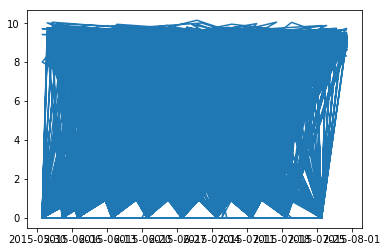

In [296]:
import matplotlib.pyplot as plt
validation_data.sort_values()
plt.plot(pd.to_datetime(validation_data.Date), validation_data.Sales  )
plt.plot(pd.to_datetime(validation_data.Date), predictions  )



